#  1. Introduction to the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.__version__

'0.24.2'

In [2]:
ted = pd.read_csv('ted.csv')

In [3]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [6]:
ted.shape # count the number of missing values in each column

(2550, 17)

In [7]:
ted.dtypes # check the data types

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [11]:
ted.isna().sum() # check if any missing values

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

# 2. Which talks provoke the most online discussions

In [14]:
ted.sort_values('comments').tail(3) # option 1 : most comments are most provoking, use .sort_values()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [15]:
ted['comments_per_view']= ted.comments / ted.views

In [18]:
ted.sort_values('comments_per_view').tail(3) #option 2: create a new comment as a KPI

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


# 3. Visualization the distribution on number of comments 

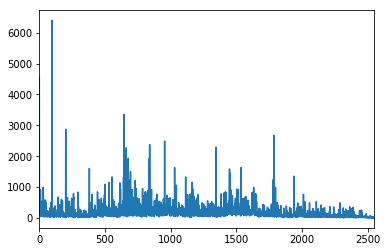

In [24]:
ted.comments.plot() # y = number of comments, x = index (not menaing much here though)

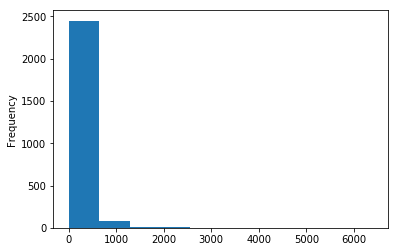

In [28]:
ted.comments.plot(kind='hist') 

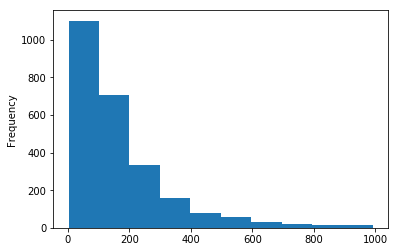

In [30]:
ted[ted.comments<1000].comments.plot(kind='hist') 

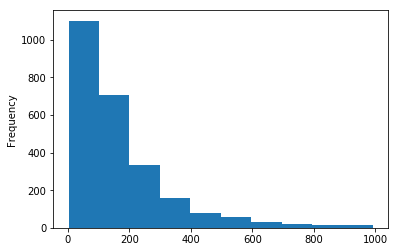

In [31]:
ted.query('comments<1000').comments.plot(kind='hist')

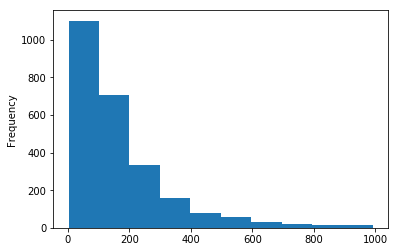

In [32]:
ted.loc[ted.comments<1000,'comments'].plot(kind='hist') # this is the recommended approach for selection

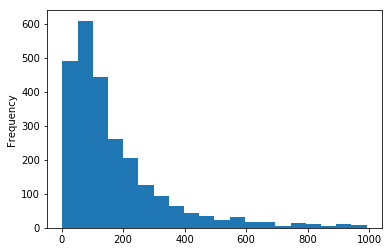

In [33]:
ted.loc[ted.comments<1000,'comments'].plot(kind='hist', bins=20)

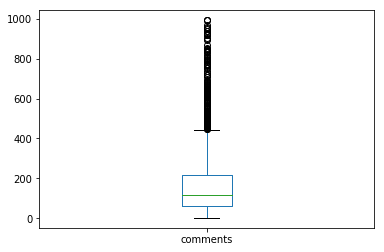

In [214]:
# boxplot can also show distributions, but it's far less useful for concentrated distributions because of outliers
ted.loc[ted.comments < 1000, 'comments'].plot(kind='box')

In [34]:
ted.shape

(2550, 18)

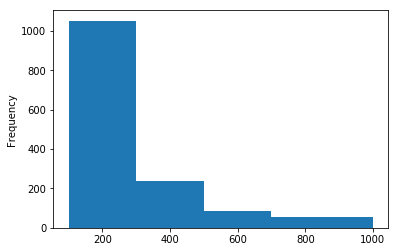

In [37]:
ted.loc[ted.comments<1000,'comments'].plot(kind='hist', bins=[100,300,300,500,700,1000]) # using bins in customized way

# 4. Plot the number of talks that took place each year

In [40]:
ted.tail(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,0.000027
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,0.000076
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721,0.000020


In [75]:
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2016    77
TED2013    77
TED2015    75
Name: event, dtype: int64

In [48]:
ted['film_datetime']= pd.to_datetime(ted.film_date, unit ='s') # unix time format conversion

In [52]:
ted[['event','film_datetime']].sample(5)  # sample to choose RANDOM records, not like head(), tail()

,event,film_datetime
2245,TED Talks Live,2015-11-05
2062,TED2015,2015-03-19
1903,TEDGlobal 2014,2014-10-15
1697,TEDGlobal 2013,2013-07-17
2080,TEDGlobal>London,2015-09-29


In [59]:
ted.film_datetime.dt.year.sort_values().sample(5)

296     2007
1584    2013
1905    2014
7       2006
894     2011
Name: film_datetime, dtype: int64

In [62]:
ted.event.str.lower().head()

0    ted2006
1    ted2006
2    ted2006
3    ted2006
4    ted2006
Name: event, dtype: object

In [71]:
ted.film_datetime.dt.year.value_counts().sort_values().head(10)

1972     1
1990     1
1994     1
1991     1
1983     1
1984     1
2001     5
1998     6
2002    27
2004    33
Name: film_datetime, dtype: int64

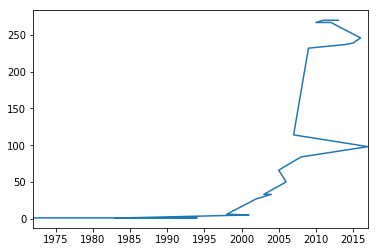

In [68]:
ted.film_datetime.dt.year.value_counts().sort_values().plot(kind='line') # because year was not sorted

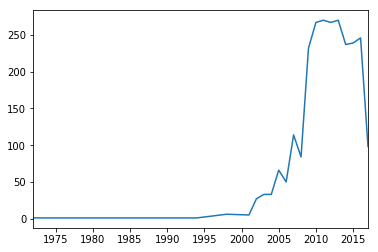

In [69]:
ted.film_datetime.dt.year.value_counts().sort_index().plot(kind='line') # the index is the year from value_counts

In [77]:
ted.sample(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,film_datetime
26,507,"Biologist Richard Dawkins makes a case for ""th...",1316,TEDGlobal 2005,1120694400,36,Richard Dawkins,Richard Dawkins: Why the universe seems so str...,1,1158019860,"[{'id': 1, 'name': 'Beautiful', 'count': 333},...","[{'id': 1276, 'hero': 'https://pe.tedcdn.com/i...",Evolutionary biologist,"['astronomy', 'biology', 'cognitive science', ...",Why the universe seems so strange,https://www.ted.com/talks/richard_dawkins_on_o...,2885999,0.000176,2005-07-07
140,304,Artist Theo Jansen demonstrates the amazingly ...,493,TED2007,1172880000,32,Theo Jansen,"Theo Jansen: My creations, a new form of life",1,1189072800,"[{'id': 9, 'name': 'Ingenious', 'count': 1514}...","[{'id': 267, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['animals', 'art', 'biomechanics', 'creativity...","My creations, a new form of life",https://www.ted.com/talks/theo_jansen_creates_...,3982352,0.000076,2007-03-03
1835,120,French economist Thomas Piketty caused a sensa...,1260,TEDSalon Berlin 2014,1403481600,24,Thomas Piketty,Thomas Piketty: New thoughts on capital in the...,1,1412605599,"[{'id': 8, 'name': 'Informative', 'count': 349...","[{'id': 2055, 'hero': 'https://pe.tedcdn.com/i...",Economist,"['economics', 'global issues', 'inequality']",New thoughts on capital in the twenty-first ce...,https://www.ted.com/talks/thomas_piketty_new_t...,1349623,0.000089,2014-06-23
285,62,In this absorbing look at emerging media and t...,1899,EG 2007,1197417600,17,Peter Hirshberg,"Peter Hirshberg: The web is more than ""better TV""",1,1220512740,"[{'id': 24, 'name': 'Persuasive', 'count': 24}...","[{'id': 19, 'hero': 'https://pe.tedcdn.com/ima...","Entrepreneur, marketer","['business', 'history', 'media', 'technology',...","The web is more than ""better TV""",https://www.ted.com/talks/peter_hirshberg_on_t...,250722,0.000247,2007-12-12
1831,91,"You’re doing everything right at work, taking ...",837,TEDxBeaconStreet,1384560000,24,Susan Colantuono,Susan Colantuono: The career advice you probab...,1,1412090046,"[{'id': 1, 'name': 'Beautiful', 'count': 147},...","[{'id': 1040, 'hero': 'https://pe.tedcdn.com/i...",Leadership expert,"['TEDx', 'business', 'gender', 'leadership', '...",The career advice you probably didn’t get,https://www.ted.com/talks/susan_colantuono_the...,3404977,0.000027,2013-11-16


# 5. What were the 'best' events in TED history to attend?

In [78]:
ted.sample(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,film_datetime
2467,35,"The more we read and watch online, the harder ...",866,TED2017,1492992000,18,Michael Patrick Lynch,Michael Patrick Lynch: How to see past your ow...,1,1496674795,"[{'id': 10, 'name': 'Inspiring', 'count': 188}...","[{'id': 2625, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['Internet', 'communication', 'democracy', 'id...",How to see past your own perspective and find ...,https://www.ted.com/talks/michael_patrick_lync...,1264166,0.000028,2017-04-24
1572,693,"Stress. It makes your heart pound, your breath...",868,TEDGlobal 2013,1370908800,47,Kelly McGonigal,Kelly McGonigal: How to make stress your friend,1,1378306783,"[{'id': 8, 'name': 'Informative', 'count': 524...","[{'id': 1501, 'hero': 'https://pe.tedcdn.com/i...",Health psychologist,"['body language', 'health', 'psychology']",How to make stress your friend,https://www.ted.com/talks/kelly_mcgonigal_how_...,14566463,0.000048,2013-06-11
756,568,Human growth has strained the Earth's resource...,1090,TEDGlobal 2010,1279238400,25,Johan Rockstrom,Johan Rockstrom: Let the environment guide our...,1,1283244120,"[{'id': 25, 'name': 'OK', 'count': 106}, {'id'...","[{'id': 535, 'hero': 'https://pe.tedcdn.com/im...",Sustainability expert,"['Anthropocene', 'agriculture', 'cities', 'cli...",Let the environment guide our development,https://www.ted.com/talks/johan_rockstrom_let_...,924806,0.000614,2010-07-16


In [80]:
ted.ratings[0] # not to 

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [85]:
ted.event.value_counts().sample(5)

TEDxLinnaeusUniversity     1
INK Conference             6
TEDxSummit                12
TEDxAtlanta                1
TED@Nairobi                1
Name: event, dtype: int64

In [96]:
ted.groupby('event').views.agg(['count','mean','sum']).sort_values('mean').tail() # use Groupby and multi aggfun

,count,mean,sum
event,,,
TEDxNorrkoping,1,6569493.0,6569493
TEDxCreativeCoast,1,8444981.0,8444981
TEDxBloomington,2,9484259.5,18968519
TEDxHouston,2,16140250.5,32280501
TEDxPuget Sound,1,34309432.0,34309432


In [100]:
ted.groupby('event').agg(['count','mean','sum']).head()

comments             duration                     \
                               count   mean  sum    count         mean   sum   
event                                                                          
AORN Congress                      1   87.0   87        1   510.000000   510   
Arbejdsglaede Live                 1  258.0  258        1  1092.000000  1092   
BBC TV                             1  146.0  146        1  3955.000000  3955   
Bowery Poetry Club                 1  177.0  177        1   182.000000   182   
Business Innovation Factory        3   88.0  264        3  1105.666667  3317   

                            film_date                           languages  \
                                count          mean         sum     count   
event                                                                       
AORN Congress                       1  1.237025e+09  1237024800         1   
Arbejdsglaede Live                  1  1.241482e+09  1241481600         1   
BBC TV                              1  4.265316e+08   426531600         1   
Bowery Poetry Club                  1  1.131805e+09  1131805080         1   
Business Innovation Factory         3  1.255018e+09  3765052800         3   

                             ... num_speaker published_date                \
                             ...         sum          count          mean   
event                        ...                                            
AORN Congress                ...           1              1  1.263028e+09   
Arbejdsglaede Live           ...           1              1  1.267802e+09   
BBC TV                       ...           1              1  1.267632e+09   
Bowery Poetry Club           ...           1              1  1.264253e+09   
Business Innovation Factory  ...           3              3  1.277548e+09   

                                        views                    \
                                    sum count      mean     sum   
event                                                             
AORN Congress                1263027540     1  149818.0  149818   
Arbejdsglaede Live           1267802040     1  971594.0  971594   
BBC TV                       1267631820     1  521974.0  521974   
Bowery Poetry Club           1264252560     1  676741.0  676741   
Business Innovation Factory  3832642740     3  304086.0  912258   

                            comments_per_view                      
                                        count      mean       sum  
event                                                              
AORN Congress                               1  0.000581  0.000581  
Arbejdsglaede Live                          1  0.000266  0.000266  
BBC TV                                      1  0.000280  0.000280  
Bowery Poetry Club                          1  0.000262  0.000262  
Business Innovation Factory                 3  0.000369  0.001107  

[5 rows x 24 columns]

# 6. Unpack the ratings data - use apply & lambda

In [101]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [103]:
import ast

In [104]:
ast.literal_eval('[1,2,3]')

[1, 2, 3]

In [105]:
ast.literal_eval(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [107]:
def str_to_list(ratings_str):
    return ast.literal_eval(ratings_str)

In [108]:
str_to_list(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [115]:
ted.ratings.apply(ast.literal_eval).head() # simplily use apply function

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [116]:
ted.ratings.apply(lambda x: str_to_list(x)).head() # use apply method and lambda function inline

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [112]:
ted['ratings_list'] = ted.ratings.apply(lambda x: str_to_list(x))

In [114]:
ted.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,film_datetime,ratings_list
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {..."
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,2006-02-24,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i..."


# 7. Count the Total numbers of ratings received by each talk

In [118]:
ted[['event','ratings_list']].sample(10)

,event,ratings_list
2001,TEDWomen 2015,"[{'id': 8, 'name': 'Informative', 'count': 100..."
614,TED2010,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 1..."
81,TEDGlobal 2005,"[{'id': 3, 'name': 'Courageous', 'count': 21},..."
1548,TEDGlobal 2013,"[{'id': 22, 'name': 'Fascinating', 'count': 51..."
970,TED2011,"[{'id': 22, 'name': 'Fascinating', 'count': 64..."
506,TEDGlobal 2009,"[{'id': 10, 'name': 'Inspiring', 'count': 123}..."
1752,TEDSalon NY2014,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 2..."
634,TED2010,"[{'id': 9, 'name': 'Ingenious', 'count': 216},..."
794,Mission Blue Voyage,"[{'id': 21, 'name': 'Unconvincing', 'count': 4..."
1467,TEDYouth 2012,"[{'id': 9, 'name': 'Ingenious', 'count': 150},..."


In [120]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [125]:
def get_num_ratings(list_of_dicts):
        num = 0
        for d in list_of_dicts:    # object 遍历
            num = num + d['count']
        return num

In [127]:
get_num_ratings(ted.ratings_list[0])  # this is a very simple but good way also, use pd.dataframe

93850

In [137]:
pd.DataFrame(ted.ratings_list[0])

,count,id,name
0,19645,7,Funny
1,4573,1,Beautiful
2,6073,9,Ingenious
3,3253,3,Courageous
4,387,11,Longwinded
5,242,2,Confusing
6,7346,8,Informative
7,10581,22,Fascinating
8,300,21,Unconvincing
9,10704,24,Persuasive


In [140]:
pd.DataFrame(ted.ratings_list[0])['count'].sum() # this is a very simple but good way also, use pd.dataframe

93850

In [133]:
ted.ratings_list.apply(get_num_ratings).head() # can use lambda format also

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [135]:
ted.ratings_list.apply(lambda x: get_num_ratings(x)).head() # use lambda format also

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [146]:
ted.ratings_list.apply(lambda x: pd.DataFrame(x)['count'].sum()).head() # yes!! this is a 3rd option!!

0    93850
1     2936
2     2824
3     3728
4    25620
Name: ratings_list, dtype: int64

In [129]:
ted['num_ratings'] = ted.ratings_list.apply(get_num_ratings) # create a new column called 'num_ratings'

In [130]:
ted.num_ratings.sample(5)

1703     1165
246     23591
1042      761
1583     2440
1062     4542
Name: num_ratings, dtype: int64

In [131]:
ted.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

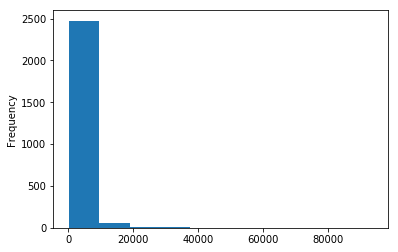

In [142]:
ted.num_ratings.plot(kind='hist')

# 8. which occupatons deliver the funnies TED talks on average?

In [147]:
ted.sample(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,film_datetime,ratings_list,num_ratings
1660,65,"Luke Syson was a curator of Renaissance art, o...",791,TEDxMet,1381881600,24,Luke Syson,Luke Syson: How I learned to stop worrying and...,1,1389889224,...,"[{'id': 1461, 'hero': 'https://pe.tedcdn.com/i...",Curator,"['TEDx', 'art', 'design', 'history', 'museums']","How I learned to stop worrying and love ""usele...",https://www.ted.com/talks/luke_syson_how_i_lea...,1149641,0.000057,2013-10-16,"[{'id': 25, 'name': 'OK', 'count': 68}, {'id':...",653
854,920,"Speaking at a TED Salon in London, Martin Jacq...",1290,TEDSalon London 2010,1286668800,33,Martin Jacques,Martin Jacques: Understanding the rise of China,1,1295884020,...,"[{'id': 992, 'hero': 'https://pe.tedcdn.com/im...","Writer, columnist","['Asia', 'business', 'china', 'culture', 'econ...",Understanding the rise of China,https://www.ted.com/talks/martin_jacques_under...,2327025,0.000395,2010-10-10,"[{'id': 22, 'name': 'Fascinating', 'count': 81...",4519
1321,78,Brute computing force alone can't solve the wo...,732,TEDGlobal 2012,1340755200,24,Shyam Sankar,Shyam Sankar: The rise of human-computer coope...,1,1346944282,...,"[{'id': 1376, 'hero': 'https://pe.tedcdn.com/i...",Data Intelligence Agent,"['AI', 'algorithm', 'computers', 'data', 'engi...",The rise of human-computer cooperation,https://www.ted.com/talks/shyam_sankar_the_ris...,856136,0.000091,2012-06-27,"[{'id': 21, 'name': 'Unconvincing', 'count': 3...",763


In [166]:
df = pd.DataFrame(ted.ratings_list[0])

In [168]:
df[df.name=='Funny'][['count']]

,count
0,19645


In [171]:
ted.ratings_list.apply(lambda x: pd.DataFrame(x)[(pd.DataFrame(x)).name=='funny','count'] # this looks not working!!??

SyntaxError: unexpected EOF while parsing (<ipython-input-171-c0f1f6b26923>, line 1)

## step 1: Count the number of funny ratings

In [172]:
ted.ratings.str.contains('Funny').value_counts()

True    2550
Name: ratings, dtype: int64

In [173]:
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] =='Funny':
            return d['count']

In [175]:
ted['funny_ratings'] = ted.ratings_list.apply(get_funny_ratings)

In [176]:
ted.funny_ratings.head()

0    19645
1      544
2      964
3       59
4     1390
Name: funny_ratings, dtype: int64

In [178]:
ted['funny_rate'] = ted.funny_ratings / ted.num_ratings

In [180]:
ted.sort_values('funny_rate').speaker_occupation.tail(10)

568                        Comedian
675                  Data scientist
21             Humorist, web artist
194                        Jugglers
2273            Comedian and writer
2114            Comedian and writer
173                        Investor
747                        Comedian
1398                       Comedian
685     Actor, comedian, playwright
Name: speaker_occupation, dtype: object

## step 3: Analyze the funny rate by occupation

In [181]:
ted.sample(4)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,tags,title,url,views,comments_per_view,film_datetime,ratings_list,num_ratings,funny_ratings,funny_rate
132,77,"In this deeply personal talk, Nigerian writer ...",1056,TEDGlobal 2007,1181088000,21,Chris Abani,Chris Abani: Telling stories from Africa,1,1186647000,...,"['Africa', 'culture', 'entertainment', 'global...",Telling stories from Africa,https://www.ted.com/talks/chris_abani_on_the_s...,561703,0.000137,2007-06-06,"[{'id': 1, 'name': 'Beautiful', 'count': 221},...",1088,140,0.128676
1334,94,When a squirrel chewed through a cable and kno...,719,TEDGlobal 2012,1340755200,28,Andrew Blum,Andrew Blum: Discover the physical side of the...,1,1348067318,...,"['Internet', 'business', 'exploration', 'techn...",Discover the physical side of the internet,https://www.ted.com/talks/andrew_blum_what_is_...,1337967,0.000070,2012-06-27,"[{'id': 25, 'name': 'OK', 'count': 114}, {'id'...",1167,54,0.046272
523,185,Many people think the lines on the map no long...,1133,TEDGlobal 2009,1248307200,26,Parag Khanna,Parag Khanna: Mapping the future of countries,1,1254099600,...,"['Asia', 'economics', 'global issues', 'histor...",Mapping the future of countries,https://www.ted.com/talks/parag_khanna_maps_th...,935859,0.000198,2009-07-23,"[{'id': 22, 'name': 'Fascinating', 'count': 33...",2084,8,0.003839
714,135,"In graphic design, Marian Bantjes says, throwi...",988,TED2010,1265932800,24,Marian Bantjes,Marian Bantjes: Intricate beauty by design,1,1277198100,...,"['art', 'design', 'innovation', 'typography']",Intricate beauty by design,https://www.ted.com/talks/marian_bantjes_intri...,629753,0.000214,2010-02-12,"[{'id': 1, 'name': 'Beautiful', 'count': 471},...",1724,35,0.020302


In [187]:
ted.groupby('speaker_occupation').funny_ratings.mean().sort_values().tail(10)

speaker_occupation
Comedian                                          1839.0
Author, blogger, entrepreneur                     1856.0
Gentleman thief                                   1864.0
Professor of Economics, University of Waterloo    1960.0
Comedian and writer                               2779.0
Vulnerability researcher                          3088.0
Actor, comedian, playwright                       3254.5
Blogger                                           3773.0
Comedian and writer                               4970.5
Author/educator                                   6190.0
Name: funny_ratings, dtype: float64

In [191]:
ted.groupby('speaker_occupation').funny_rate.agg(['count','sum','mean']).sort_values('mean').tail(10)

,count,sum,mean
speaker_occupation,,,
Science humorist,1,0.468405,0.468405
Social energy entrepreneur,1,0.502117,0.502117
"Comedian, voice artist",1,0.503542,0.503542
Cartoon editor,1,0.511628,0.511628
Satirist,1,0.512383,0.512383
Comedian,6,3.074740,0.512457
"Actor, writer",1,0.515152,0.515152
"Actor, comedian, playwright",2,1.116214,0.558107
Jugglers,1,0.566828,0.566828


## step 4: Focus on occupations that are well-presented in the data

In [210]:
ted.speaker_occupation.value_counts().sort_values().tail(5)

Entrepreneur    31
Journalist      33
Designer        34
Artist          34
Writer          45
Name: speaker_occupation, dtype: int64

In [197]:
occupation_counts = ted.speaker_occupation.value_counts()

In [211]:
type(occupation_counts)

pandas.core.series.Series

In [213]:
occupation_counts.index

Index(['Writer', 'Artist', 'Designer', 'Journalist', 'Entrepreneur',
       'Architect', 'Inventor', 'Psychologist', 'Photographer', 'Filmmaker',
       ...
       'Director/choreographer, dancer', 'Children's book author',
       'Communications researcher', 'Entrepreneur and conservationist',
       'Endurance runner', 'Assumption-busting economist',
       'Artist, composer, engineer', 'Connector', 'Green auto pioneer',
       'New media artist'],
      dtype='object', length=1458)

In [198]:
top_occupations = occupation_counts[occupation_counts>=5].index # this is operation to a series rather than a DataFrame, so.....

In [199]:
type(occupation_counts) # what are the columns of seriies, or series does not have any columns at all !


pandas.core.series.Series

In [207]:
top_occupations

Index(['Writer', 'Artist', 'Designer', 'Journalist', 'Entrepreneur',
       'Architect', 'Inventor', 'Psychologist', 'Photographer', 'Filmmaker',
       'Economist', 'Neuroscientist', 'Author', 'Educator', 'Roboticist',
       'Philosopher', 'Biologist', 'Physicist', 'Marine biologist', 'Musician',
       'Activist', 'Technologist', 'Global health expert; data visionary',
       'Oceanographer', 'Astronomer', 'Behavioral economist', 'Philanthropist',
       'Poet', 'Historian', 'Graphic designer', 'Singer/songwriter',
       'Futurist', 'Engineer', 'Novelist', 'Social psychologist',
       'Computer scientist', 'Astrophysicist', 'Mathematician',
       'Legal activist', 'Climate advocate', 'Photojournalist',
       'Social entrepreneur', 'Evolutionary biologist', 'Reporter', 'Comedian',
       'Singer-songwriter', 'Performance poet, multimedia artist',
       'Techno-illusionist', 'Writer, activist', 'Science writer',
       'Researcher', 'Chemist', 'Violinist', 'Physician',
       'In

In [208]:
ted_top_occupations = ted[ted.speaker_occupation.isin(top_occupations)]

In [209]:
ted_top_occupations

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,tags,title,url,views,comments_per_view,film_datetime,ratings_list,num_ratings,funny_ratings,funny_rate
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,...,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,2006-02-25,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",2936,544,0.185286
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,...,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,2006-02-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...",25620,1390,0.054254
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,...,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,0.000048,2006-02-23,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...",1024,9,0.008789
11,55,Jehane Noujaim unveils her 2006 TED Prize wish...,1538,TED2006,1140912000,20,Jehane Noujaim,Jehane Noujaim: My wish: A global day of film,1,1153786260,...,"['TED Prize', 'art', 'culture', 'entertainment...",My wish: A global day of film,https://www.ted.com/talks/jehane_noujaim_inspi...,387877,0.000142,2006-02-26,"[{'id': 1, 'name': 'Beautiful', 'count': 70}, ...",592,5,0.008446
14,99,"Nicholas Negroponte, founder of the MIT Media ...",1057,TED2006,1140652800,25,Nicholas Negroponte,Nicholas Negroponte: One Laptop per Child,1,1154391060,...,"['children', 'design', 'education', 'entrepren...",One Laptop per Child,https://www.ted.com/talks/nicholas_negroponte_...,358304,0.000276,2006-02-23,"[{'id': 3, 'name': 'Courageous', 'count': 83},...",781,14,0.017926
15,325,Violinist Sirena Huang gives a technically bri...,1481,TED2006,1140652800,31,Sirena Huang,Sirena Huang: An 11-year-old's magical violin,1,1154995860,...,"['entertainment', 'music', 'performance', 'vio...",An 11-year-old's magical violin,https://www.ted.com/talks/sirena_huang_dazzles...,2702470,0.000120,2006-02-23,"[{'id': 1, 'name': 'Beautiful', 'count': 1671}...",6239,190,0.030454
26,507,"Biologist Richard Dawkins makes a case for ""th...",1316,TEDGlobal 2005,1120694400,36,Richard Dawkins,Richard Dawkins: Why the universe seems so str...,1,1158019860,...,"['astronomy', 'biology', 'cognitive science', ...",Why the universe seems so strange,https://www.ted.com/talks/richard_dawkins_on_o...,2885999,0.000176,2005-07-07,"[{'id': 1, 'name': 'Beautiful', 'count': 333},...",4594,127,0.027645
27,95,"""Freakonomics"" author Steven Levitt presents n...",1275,TED2004,1077840000,25,Steven Levitt,Steven Levitt: The freakonomics of crack dealing,1,1158624660,...,"['business', 'cities', 'culture', 'economics',...",The freakonomics of crack dealing,https://www.ted.com/talks/steven_levitt_analyz...,2863214,0.000033,2004-02-27,"[{'id': 7, 'name': 'Funny', 'count': 485}, {'i...",2036,485,0.238212
28,355,"""Tipping Point"" author Malcolm Gladwell gets i...",1050,TED2004,1077753600,37,Malcolm Gladwell,"Malcolm Gladwell: Choice, happiness and spaghe...",1,1158624660,...,"['business', 'choice', 'consumerism', 'culture...","Choice, happiness and spaghetti sauce",https://www.ted.com/talks/malcolm_gladwell_on_...,7023562,0.000051,2004-02-26,"[{'id': 7, 'name': 'Funny', 'count': 1668}, {'...",10678,1668,0.156209
30,991,Psychologist Barry Schwartz takes aim at a cen...,1177,TEDGlobal 2005,1121385600,45,Barry Schwartz,Barry Schwartz: The paradox of choice,1,1159229460,...,"['business', 'choice', 'culture', 'decision-ma...",The paradox of cho

In [ ]:
ted.